In [64]:
#xyzファイルのインポート
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("C:/Users/kozo/Documents/PYTHON/Least_squares/example_surfacepcd.xyz", "r") as inf:
    iary = inf.readlines()

le = len(iary)
xyz = np.zeros((le, 3))

for i, ary in enumerate(iary):
    ary = ary.replace("\n", "")
    data = ary.split(" ")
    u, m, p = float(data[0]), float(data[1]), float(data[2])
    xyz[i] = [u, m, p]

#yz平面データ
print(le)
print(xyz)

#座標ごとの配列に転置
x, y, z = xyz.T

4354
[[-2.75518950e-03  3.09550912e-02 -1.50210862e-01]
 [-2.75518950e-03  1.59552748e-02 -1.48209524e-01]
 [-2.75518950e-03  1.89601858e-02 -1.36184861e-01]
 ...
 [-2.75518950e-03  2.49947463e-02 -5.80070768e-02]
 [-2.75518950e-03  3.49946239e-02 -3.61606376e-05]
 [-2.75518950e-03  3.49946239e-02 -5.80086018e-02]]


-0.10901350896388423 0.09998393288071648 -0.15314687510986585 0.000962754190741866


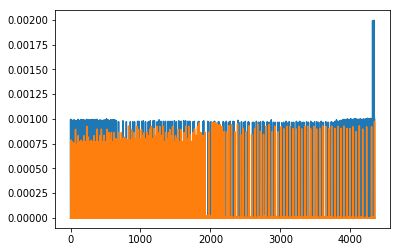

In [83]:
#y,zの最小値と最大値

y_min, y_max = y.min(), y.max()
z_min, z_max = z.min(), z.max()

print(y_min, y_max, z_min, z_max)


y_sort = np.sort(y)
z_sort = np.sort(z)
lel = np.arange(le)


#y_sort,z_sort の微分
y_grad = np.zeros(le)
z_grad = np.zeros(le)

for i in lel:
    if i == 0:
        continue
    y_grad[i] = y_sort[i] - y_sort[i - 1]
    z_grad[i] = z_sort[i] - z_sort[i - 1]

plt.plot(y_grad)
plt.plot(z_grad)


[-0.10901351 -0.10801847 -0.10801352 ...  0.09998393  0.09998393
  0.09998393]


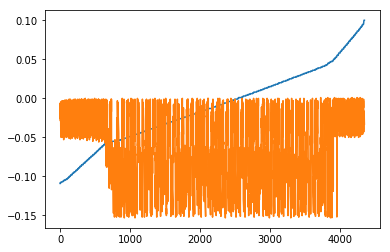

In [82]:
#y, z点の点数の微分

#分割数N
N = le / 100 #各分割領域に点群が少なくとも100ほど存在できるくらいの精度

#yを基準にソート
for i in range(len(y)):
    for j in range(len(y) - i - 1):
        if y[j] > y[j + 1]:
            a, b = y[j], z[j]
            y[j], z[j] = y[j + 1], z[j + 1]
            y[j + 1], z[j + 1] = a, b
            
            
print(y)
#plt.plot(y,z)
plt.plot(y)
plt.plot(z)